In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("white")
sns.set_palette("Pastel1")

import matplotlib as mpl
mpl.__version__

'3.4.1'

In [2]:
import warnings
warnings.filterwarnings('ignore')
import glob
import os
import joblib
import pandas as pd
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from catboost import Pool, CatBoostClassifier
from kaggler.model import AutoLGB
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, StratifiedShuffleSplit 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import random

# 문제 정의

# 데이터 수집

## 데이콘 기본 데이터

In [3]:
train = pd.read_csv('data/train.csv')
import ppc
ppc.null(train)

occyp_type    8171
dtype: int64

In [4]:
train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [7]:
train = pd.read_csv('data/train.csv').fillna('NAN')
test = pd.read_csv('data/test.csv').fillna('NAN')
sample_submission = pd.read_csv('data/sample_submission.csv')
ppc.null(train)

Series([], dtype: int64)

In [8]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NAN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [11]:
train_copy = train
test_copy = test
sample_submission_copy = sample_submission

# 데이터 전처리

In [15]:
X = train.drop(['credit'], axis=1)
y = train['credit']
test_x = test.copy()

true = train[['credit']]
true['0'] = true['credit'][true['credit']==0.0]
true['1'] = true['credit'][true['credit']==1.0]
true['2'] = true['credit'][true['credit']==2.0]
del true['credit']
true = true.replace([0.0, 2.0], [1.0, 1.0])
true = true.fillna(0)
true = true.values

In [22]:
train_portion = 0.8

np.random.seed(42)
idx_train = np.random.choice(X.index, size=int(X.shape[0]*train_portion)) 
# https://rfriend.tistory.com/548
idx_val = list(set(X.index) - set(idx_train))

X_train = X.loc[idx_train]
X_val = X.loc[idx_val]

y_train = y.loc[idx_train]
y_val = y.loc[idx_val]

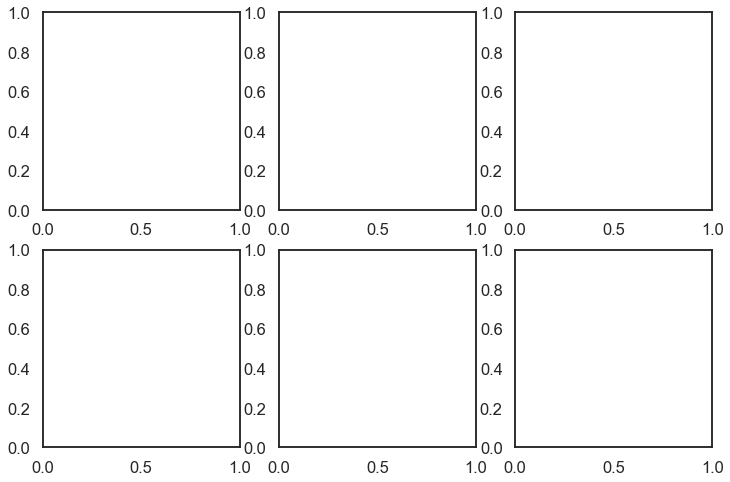

In [24]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12,8))
axes = axes.ravel()

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12,8))
axes = axes.ravel()

for ax, col in zip(axes, train_copy.columns):
    
    # X features
    

In [ ]:
train.columns

In [ ]:
object_col = []
for col in train.columns:
    if train[col].dtype == 'O':
        object_col.append(col)

In [ ]:
object_col

In [ ]:
enc = OneHotEncoder()
enc.fit(train.loc[:,object_col])

train_onehot_df = pd.DataFrame(enc.transform(train.loc[:, object_col]).toarray(), 
                               columns=enc.get_feature_names(object_col))
train.drop(object_col, axis=1, inplace=True)
train = pd.concat([train, train_onehot_df], axis=1)

In [ ]:
test_onehot_df = pd.DataFrame(enc.transform(test.loc[:, object_col]).toarray(),
                              columns=enc.get_feature_names(object_col))
test.drop(object_col, axis=1, inplace=True)
test = pd.concat([test, test_onehot_df], axis=1)

# 탐색적 데이터 분석

# 변수 조정

In [ ]:
train.head()

In [ ]:
train_x = train.drop(['credit'], axis=1)
train_y = train['credit']
test_x = test.copy()

true = train[['credit']]
true['0'] = true['credit'][true['credit']==0.0]
true['1'] = true['credit'][true['credit']==1.0]
true['2'] = true['credit'][true['credit']==2.0]
del true['credit']
true = true.replace([0.0, 2.0], [1.0, 1.0])
true = true.fillna(0)
true = true.values

In [ ]:
true

In [ ]:
train_x

# 6. 모델 학습

In [ ]:
pred_dict = {}
pred_test_dict = {}

In [ ]:
train_portion = 0.8

np.random.seed(42)
idx_train = np.random.choice(X.index, size=int(X.shape[0]*train_portion))

In [ ]:
train_portion = 0.8

np.random.seed(42)
idx_train = np.random.choice(train.index, size=int(train.shape[0]*train_portion))
idx_test = list(set(train.index) - set(idx_train))

X_train = train.loc[idx_train]
X_test = train.loc[idx_test]

y_train = .loc[idx_train]
y_test = y.loc[idx_test]

## (1) Lightgbm

### Parameter Tuning

### 3 seeds x 5 folds

In [ ]:
x_train, x_val = train_x.iloc[train_idx], train_x.iloc[val_idx]
y_train, y_val = train_y.iloc[train_idx], train_y.iloc[val_idx]

lgbmodel = LGBMClassifier(learning_rate=0.005, objective='multiclass', n_estimators=10000, num_leaves=400, 
                                  max_depth=-1, min_child_weight=2, colsample_bytree=0.4,  
                                   n_jobs=-1, random_state=seed)

lgbmodel.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=30, verbose=None) 

In [ ]:
lucky_seeds=[42,2019,91373]

for i, seed in enumerate(lucky_seeds):

    kfold = KFold(n_splits=5, random_state = seed, shuffle = True)
    cv=np.zeros((train.shape[0], 3))
    pred_test = np.zeros((test_x.shape[0], 3), dtype=float)
    
    for n, (train_idx, val_idx) in enumerate(kfold.split(train)):

        x_train, x_val = train_x.iloc[train_idx], train_x.iloc[val_idx]
        y_train, y_val = train_y.iloc[train_idx], train_y.iloc[val_idx]

        lgbmodel = LGBMClassifier(learning_rate=0.005, objective='multiclass', n_estimators=10000, num_leaves=400, 
                                  max_depth=-1, min_child_weight=2, colsample_bytree=0.4,  
                                   n_jobs=-1, random_state=seed)

        lgbmodel.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=30, verbose=None) 
        #joblib.dump(lgbmodel, f'./pred_pkl/LGB_{n+1}_fold_{seed}_seed_lgb.pkl')

        # CROSS-VALIDATION , EVALUATE CV
        cv[val_idx,:] = lgbmodel.predict_proba(x_val)
        pred_test += lgbmodel.predict_proba(test_x) / 5
    pred_dict['lgb'+str(i+1)] = cv
    pred_test_dict['lgb'+str(i+1)] = pred_test
        
    print('multi_logloss :', log_loss(true, cv))

lgbmodels_path = os.listdir('./pred_pkl/')
lgbmodels_list = [x for x in lgbmodels_path if x.endswith("lgb.pkl")]
assert len(lgbmodels_list) == 15
lgb_preds = np.zeros((test_x.shape[0], 3))

for m in lgbmodels_list:
    lgbmodel = joblib.load('./pred_pkl/'+m)
    lgb_preds_proba = lgbmodel.predict_proba(test)
    lgb_preds += lgb_preds_proba/15

## (2) XGBoost

### Parameter Tuning

params = {'learning_rate':[0.01, 0.005],
          'max_depth': [30, 35, 40] # 튜닝할 파라미터 삽입
            }

xgb_clf = XGBClassifier(n_estimators=100, min_child_weight=2, 
                        colsample_bytree=0.8, colsample_bylevel=0.8, subsample=0.8,
                        num_class=3, objective='multiclass', n_jobs=-1)

grid_cv = GridSearchCV(xgb_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(train_x, train_y)

hr_grid_df = pd.DataFrame(grid_cv.cv_results_)
hr_grid_df.loc[:, ['mean_test_score', "params"]]

### 3 seeds x 5 folds

In [ ]:
lucky_seeds=[42, 2019, 91373]
xgtest = xgb.DMatrix(test_x)
for i, seed in enumerate(lucky_seeds):

    kfold = KFold(n_splits=5, random_state = seed, shuffle = True)
    cv = np.zeros((train.shape[0], 3))
    pred_test = np.zeros((test_x.shape[0], 3), dtype=float)

    for n, (train_idx, val_idx) in enumerate(kfold.split(train)):
        
        x_train, x_val = train_x.iloc[train_idx], train_x.iloc[val_idx]
        y_train, y_val = train_y.iloc[train_idx], train_y.iloc[val_idx]
        
        dtrain = xgb.DMatrix(x_train, label=y_train)
        dvalid = xgb.DMatrix(x_val, label=y_val)
        watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

        param = {'objective':'multi:softprob', 'seed':seed, 'num_class': 3, 'eval_metric':'mlogloss', 
                 'eta': 0.004, 'max_depth': 70, 'min_child_weight': 3,
                 'colsample_bytree': 0.3, 'colsample_bylevel': 0.6, 'subsample': 0.8
                }

        xgbmodel = xgb.train(param, dtrain, 10000, watchlist, early_stopping_rounds=30, verbose_eval=None)
        #joblib.dump(xgbmodel, f'./pred_pkl/XGB_{n+1}_fold_{seed}_seed_xgb.pkl')

        cv[val_idx, :] = xgbmodel.predict(dvalid)
        pred_test += xgbmodel.predict(xgtest) / 5
        
    pred_dict['xgb'+str(i+1)] = cv
    pred_test_dict['xgb'+str(i+1)] = pred_test
    print('multi_logloss:', log_loss(true, cv))

xgbmodels_path = os.listdir('./pred_pkl/')
xgbmodels_list = [x for x in xgbmodels_path if x.endswith("xgb.pkl")]
assert len(xgbmodels_list) == 15
xgb_preds = np.zeros((test_x.shape[0], 3))
xgtest = xgb.DMatrix(test_X)

for m in xgbmodels_list:
    xgbmodel = joblib.load('./pred_pkl/'+m)
    xgb_preds_proba = xgbmodel.predict_proba(xgtest)
    xgb_preds += xgb_preds_proba/15

## Random Forest

### GridSearchCV

params = {'max_depth': [55, 60, 65] # 튜닝할 파라미터 삽입
            }

rf_clf = RandomForestClassifier(random_state = 0, n_estimators = 1000, 
                                min_samples_leaf=2, min_samples_split=2,
                                criterion='entropy', n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(df_train, y)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

### 3 seeds, 5 folds

In [ ]:
lucky_seeds=[42,2019,91373]
for i, seed in enumerate(lucky_seeds):

    kfold = KFold(n_splits=5, random_state = seed, shuffle = True)
    cv = np.zeros((train.shape[0], 3))
    pred_test = np.zeros((test_x.shape[0], 3), dtype=float)
    
    for n, (train_idx, val_idx) in enumerate(kfold.split(train)):
        
        x_train, x_val = train_x.iloc[train_idx], train_x.iloc[val_idx]
        y_train, y_val = train_y.iloc[train_idx], train_y.iloc[val_idx]

        rfmodel = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=55,
                                         min_samples_leaf=2, min_samples_split=2,
                                         random_state=seed)
        rfmodel.fit(x_train, y_train)
        #joblib.dump(rfmodel, f'./pred_pkl/RF_{n+1}_fold_{seed}_seed_rf.pkl')
        
        cv[val_idx, :] = rfmodel.predict_proba(x_val)        
        pred_test += rfmodel.predict_proba(test_x) / 5
        
    pred_dict['rf'+str(i+1)] = cv
    pred_test_dict['rf'+str(i+1)] = pred_test
    print('multi_logloss :', log_loss(true, cv))

rfmodels_path = os.listdir('./pred_pkl/')
rfmodels_list = [x for x in rfmodels_path if x.endswith("rf.pkl")]
assert len(rfmodels_list) == 15
rf_preds = np.zeros((test_x.shape[0], 3))

for m in rfmodels_list:
    rfmodel = joblib.load('./pred_pkl/'+m)
    rf_preds_proba = rfmodel.predict_proba(test_x)
    rf_preds += rf_preds_proba/15

## Catboost (성능X)

lucky_seeds=[42,2019,91373]
for i, seed in enumerate(lucky_seeds):

    kfold = KFold(n_splits=5, random_state = seed, shuffle = True)
    cv = np.zeros((train.shape[0], 3))
    pred_test = np.zeros((test_x.shape[0], 3), dtype=float)
    
    for n, (train_idx, val_idx) in enumerate(kfold.split(train)):
        
        x_train, x_val = train_x.iloc[train_idx], train_x.iloc[val_idx]
        y_train, y_val = train_y.iloc[train_idx], train_y.iloc[val_idx]
        _train = Pool(x_train, label=y_train)
        _valid = Pool(x_val, label=y_val)

        catmodel =  CatBoostClassifier(loss_function='MultiClass', early_stopping_rounds=50, 
                                       random_state=seed, learning_rate=0.02, iterations=100000
                                       #task_type="GPU"
                                      )
        
        catmodel.fit(_train, eval_set=_valid, use_best_model=True, verbose=2000)
        #joblib.dump(rfmodel, f'./pred_pkl/RF_{n+1}_fold_{seed}_seed_rf.pkl')
        
        cv[val_idx, :] = catmodel.predict_proba(x_val)        
        pred_test += catmodel.predict_proba(test_x) / 5
        
    pred_dict['cat'+str(i+1)] = cv
    pred_test_dict['cat'+str(i+1)] = pred_test
    print('multi_logloss :', log_loss(true, cv))

## Stacking (AutoLGB)

### 27features = 3seed(42, 2019, 91373) x 3model(lgb, xgb, rf) x 3class(0, 1, 2)

In [ ]:
X_train = pd.DataFrame(np.hstack([x for _, x in pred_dict.items()]))
X_test = pd.DataFrame(np.hstack([x for _, x in pred_test_dict.items()]))

pred = np.zeros((X_train.shape[0], 3), dtype=float)
pred_test = np.zeros((X_test.shape[0], 3), dtype=float)
#kfold = KFold(n_splits=5, random_state = seed, shuffle = True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i_cv, (i_trn, i_val) in enumerate(cv.split(X_train, train_y)):
    if i_cv == 0:
        clf = AutoLGB(objective='multiclass', metric='multi_logloss', params={'num_class': 3}, 
                      feature_selection=False, n_est=10000)
        clf.tune(X_train.iloc[i_trn], train_y[i_trn])
        n_best = clf.n_best
        features = clf.features
        params = clf.params
        print(f'best iteration: {n_best}')
        print(f'selected features ({len(features)}): {features}')        
        print(params)
        clf.fit(X_train.iloc[i_trn], train_y[i_trn])
    else:
        train_data = lgb.Dataset(X_train[features].iloc[i_trn], label=train_y[i_trn])
        clf = lgb.train(params, train_data, n_best, verbose_eval=100)
    
    pred[i_val] = clf.predict(X_train[features].iloc[i_val])
    pred_test += clf.predict(X_test[features]) / 5

In [ ]:
print(f'CV Log Loss: {log_loss(train_y, pred):.6f}')

# 결과 제출

In [ ]:
submission = sample_submission.copy()
submission.iloc[:, 1:] = pred_test

In [ ]:
submission.to_csv('submission/submission.csv', index=False)